In [6]:
import tensorflow as tf
import numpy as n
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_lfw_people

In [7]:
faces = fetch_lfw_people(min_faces_per_person=60)
X = faces.data
y = faces.target
target_names = faces.target_names

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(62 * 47,)),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(len(target_names), activation='softmax')
])

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
34/34 [==============================] - 3s 17ms/step - loss: 1.9397 - accuracy: 0.3896
Epoch 2/10
34/34 [==============================] - 1s 17ms/step - loss: 1.7909 - accuracy: 0.4007
Epoch 3/10
34/34 [==============================] - 0s 13ms/step - loss: 1.7849 - accuracy: 0.4007
Epoch 4/10
34/34 [==============================] - 0s 13ms/step - loss: 1.7841 - accuracy: 0.4007
Epoch 5/10
34/34 [==============================] - 1s 16ms/step - loss: 1.7798 - accuracy: 0.4007
Epoch 6/10
34/34 [==============================] - 0s 13ms/step - loss: 1.7782 - accuracy: 0.4007
Epoch 7/10
34/34 [==============================] - 0s 13ms/step - loss: 1.7758 - accuracy: 0.4007
Epoch 8/10
34/34 [==============================] - 0s 13ms/step - loss: 1.7734 - accuracy: 0.4007
Epoch 9/10
34/34 [==============================] - 0s 13ms/step - loss: 1.7696 - accuracy: 0.4007
Epoch 10/10
34/34 [==============================] - 0s 13ms/step - loss: 1.7655 - accuracy: 0.4007


In [13]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test accuracy:", test_accuracy)

9/9 [==============================] - 0s 5ms/step - loss: 1.7934 - accuracy: 0.3630
Test accuracy: 0.3629629611968994


In [14]:
predictions = model.predict(X_test)

predicted_classes = [target_names[np.argmax(prediction)] for prediction in predictions]

9/9 [==============================] - 0s 4ms/step


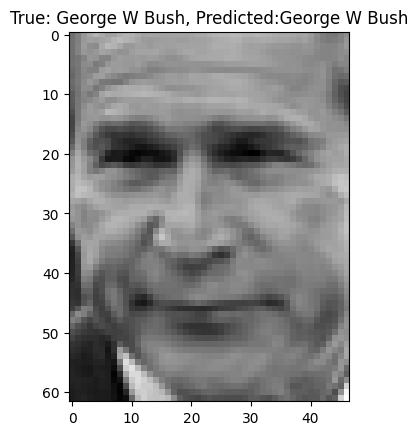

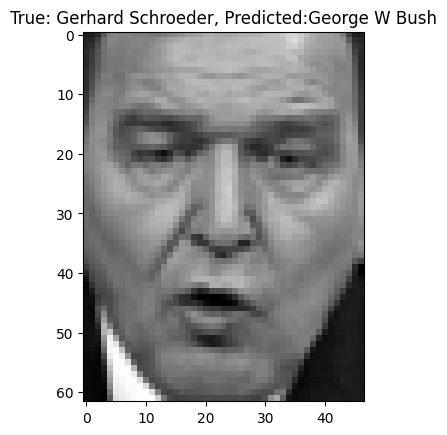

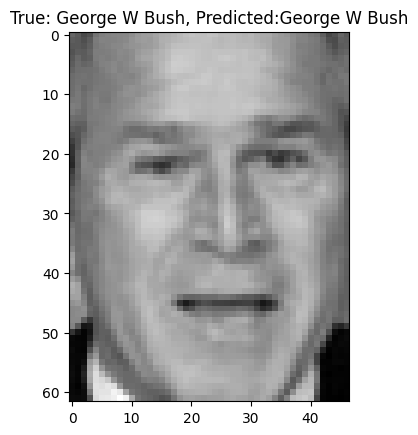

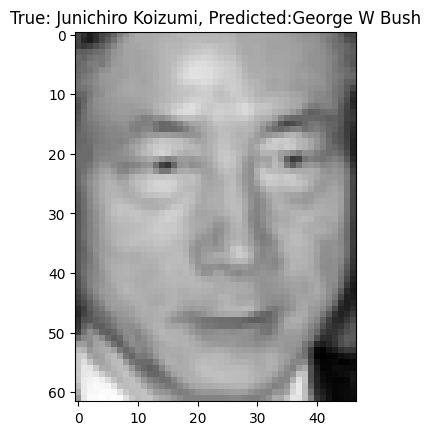

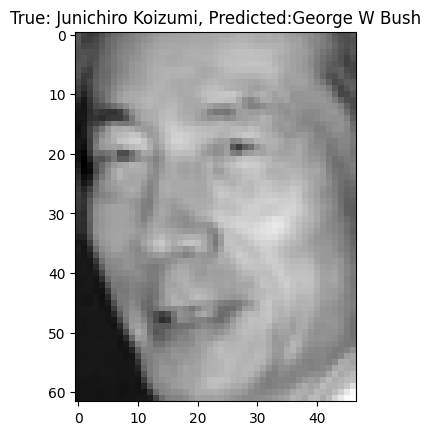

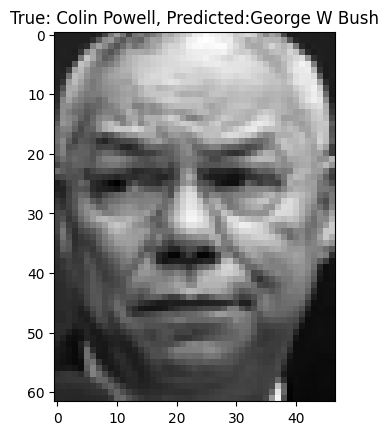

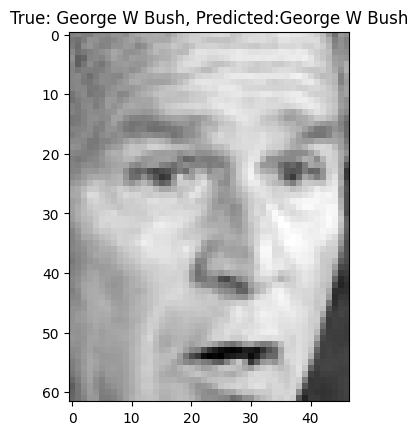

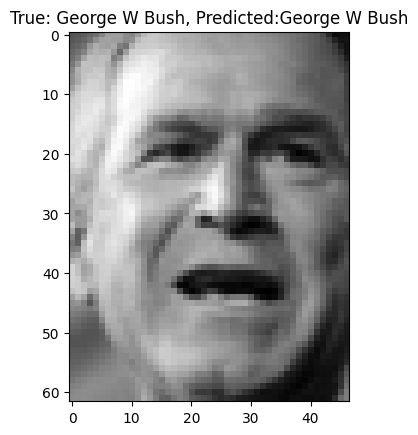

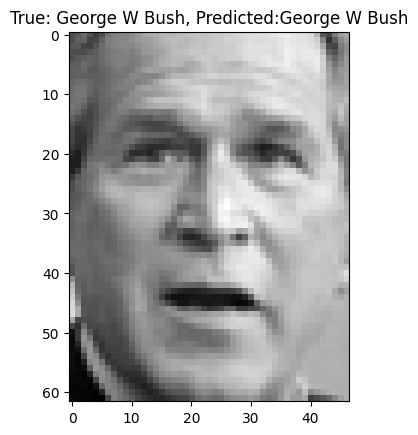

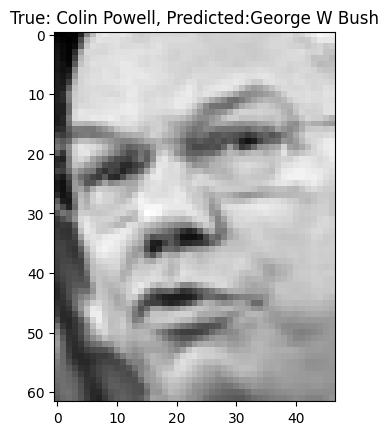

In [16]:
for i in range(10):
  plt.imshow(X_test[i].reshape(62, 47), cmap='gray')
  plt.title(f"True: {target_names[y_test[i]]}, Predicted:{predicted_classes[i]}")
  plt.show()

